UTJECAJ UDALJENOSTI GRADOVA OD MORA NA KLIMU

In [ ]:
import numpy as np

In [55]:
# utjecaj blizine mora na kretanje temperature
# 01. Pula		0		44.87023 13.84553 https://api.openweathermap.org/data/2.5/onecall?lat=44.87023&lon=13.84553&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255
# 02. Pazin		27		45.23920 13.93633 https://api.openweathermap.org/data/2.5/onecall?lat=45.23920&lon=13.93633&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255
# 03. Motovun	18		45.33671 13.82828 https://api.openweathermap.org/data/2.5/onecall?lat=45.33671&lon=13.82828&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255
# 04. Labin		1		45.09140 14.12360 https://api.openweathermap.org/data/2.5/onecall?lat=45.09140&lon=14.12360&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255
# 05. Buzet		30		45.40788 13.96559 https://api.openweathermap.org/data/2.5/onecall?lat=45.40788&lon=13.96559&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255
# 06. Buje		10		45.40839 13.65875 https://api.openweathermap.org/data/2.5/onecall?lat=45.40839&lon=13.65875&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255
# 07. Višnjan	10		45.27602 13.71887 https://api.openweathermap.org/data/2.5/onecall?lat=45.27602&lon=13.71887&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255
# 08. Kanfanar	17		45.12284 13.83850 https://api.openweathermap.org/data/2.5/onecall?lat=45.12284&lon=13.83850&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255
# 09. Žminj		20		45.14391 13.90868 https://api.openweathermap.org/data/2.5/onecall?lat=45.14391&lon=13.90868&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255
# 10. Vodnjan	5		44.96034 13.84978 https://api.openweathermap.org/data/2.5/onecall?lat=44.96034&lon=13.84978&&dt=1715097020&appid=a38edf57331518ae5f14c42cff1ba255

In [56]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime
import time
import json
import requests

In [57]:
def generate_unix_dates():
	cut = int((time.mktime(datetime.datetime.now().timetuple())))
	ud = 60*60*24		# 86400
	return sorted([cut - x*ud for x in range(5)])

In [58]:
cities = {
	"Pula":		[0,		44.87023,13.84553],
	"Pazin":	[27,	45.23920,13.93633],
	"Motovun":	[18,	45.33671,13.82828],
	"Labin":	[1,		45.09140,14.12360],
	"Buzet":	[30,	45.40788,13.96559],
	"Buje":		[10,	45.40839,13.65875],
	"Visnjan":	[10,	45.27602,13.71887],
	"Kanfanar":	[17,	45.12284,13.83850],
	"Zminj":	[20,	45.14391,13.90868],
	"Vodnjan":	[5,		44.96034,13.84978]
}

In [59]:
url = "/".join(["https://api.openweathermap.org","data","2.5","onecall","timemachine"])

# data:
pula_lat = "lat="+str(cities["Pula"][1])
pula_lon = "lon="+str(cities["Pula"][2])
dt = "dt="+str(generate_unix_dates()[0])
appid = "appid=a38edf57331518ae5f14c42cff1ba255"

data = "&".join([pula_lat,pula_lon,dt,appid])
data
# pula = json.loads(requests.get("?".join([url,data])).text)

In [62]:
def load_data(city_name,timestamp):
	url = "/".join(["https://api.openweathermap.org","data","2.5","onecall","timemachine"])

	# data:
	lat = "lat="+str(cities[city_name][1])
	lon = "lon="+str(cities[city_name][2])
	dt = "dt="+str(timestamp)
	appid = "appid=a38edf57331518ae5f14c42cff1ba255"

	data = "&".join([lat,lon,dt,appid])

	return json.loads(requests.get("?".join([url,data])).text)


In [63]:
def filter_city_weather_per_hour(hourly_data,city_name):
	
	temp = hourly_data["temp"] - 273.15
	humidity = hourly_data["humidity"]
	pressure = hourly_data["pressure"]
	description = hourly_data["weather"][0]['description']
	dt = hourly_data["dt"]
	wind_speed = hourly_data["wind_speed"]
	wind_deg = hourly_data["wind_deg"]

	return [
		round(temp,2),
		humidity,
		pressure,
		description,
		dt,
		wind_speed,
		wind_deg,
		city_name,
		datetime.datetime.strftime(
			datetime.datetime.fromtimestamp(hourly_data['dt']),
			"%Y-%m-%d %H:%M:%S"
		)
	]


In [64]:
ud = generate_unix_dates()

for city_name in cities:
	print(city_name)
	df_list = []
	for timestamp in ud:
		# print(timestamp)
		data = load_data(city_name,timestamp)
		# print(data["hourly"])
		# print(len(data["hourly"]))

		for i in range(len(data["hourly"])):
			temp_df = filter_city_weather_per_hour(data["hourly"][i],city_name)
			temp_df.append(cities[city_name][0])
			df_list.append(temp_df)
	
	headings = ["temp","humidity","pressure","description","dt","wind_speed","wind_deg","city_name","day","distance"]
	data_frame = pd.DataFrame(df_list,columns=headings)
	city_lower = city_name.lower()
	data_frame.to_csv(f"df_{city_name}.csv",mode='w')

Pula
[{'dt': 1714694400, 'temp': 284.42, 'feels_like': 284.03, 'pressure': 1009, 'humidity': 93, 'dew_point': 283.33, 'uvi': 0, 'clouds': 20, 'visibility': 10000, 'wind_speed': 0.51, 'wind_deg': 0, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}]}, {'dt': 1714698000, 'temp': 284.42, 'feels_like': 284.03, 'pressure': 1009, 'humidity': 93, 'dew_point': 283.33, 'uvi': 0, 'clouds': 40, 'visibility': 10000, 'wind_speed': 0, 'wind_deg': 0, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}]}, {'dt': 1714701600, 'temp': 283.42, 'feels_like': 282.93, 'pressure': 1009, 'humidity': 93, 'dew_point': 282.34, 'uvi': 0, 'clouds': 40, 'visibility': 10000, 'wind_speed': 0, 'wind_deg': 0, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}]}, {'dt': 1714705200, 'temp': 283.42, 'feels_like': 282.93, 'pressure': 1009, 'humidity': 93, 'dew_point': 282.34, 'uvi': 0, 'clouds': 20, 'visibili

In [65]:
df_pula=pd.read_csv('df_pula.csv')
df_pazin=pd.read_csv('df_pazin.csv')
df_motovun=pd.read_csv('df_motovun.csv')
df_labin=pd.read_csv('df_labin.csv')
df_buzet=pd.read_csv('df_buzet.csv')
df_buje=pd.read_csv('df_buje.csv')
df_visnjan=pd.read_csv('df_visnjan.csv')
df_kanfanar=pd.read_csv('df_kanfanar.csv')
df_zminj=pd.read_csv('df_zminj.csv')
df_vodnjan=pd.read_csv('df_visnjan.csv') 

In [66]:
plt.rcParams['figure.figsize']=[10,8]
plt.rcParams['figure.dpi']=100

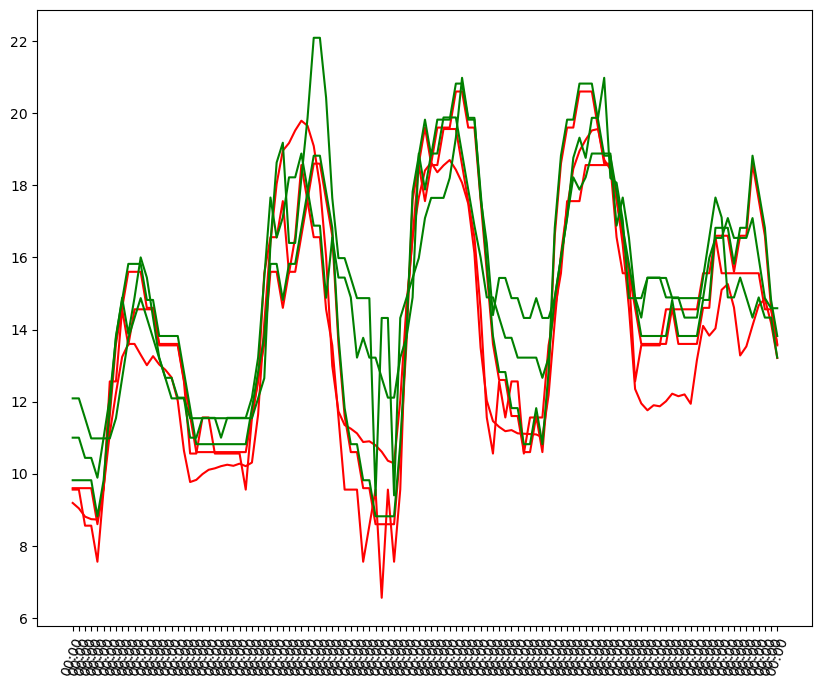

In [67]:
y1=df_kanfanar['temp']
x1=df_kanfanar['day']
y2=df_pazin['temp']
x2=df_pazin['day']
y3=df_motovun['temp']
x3=df_motovun['day']
y4=df_labin['temp']
x4=df_labin['day']
y5=df_buzet['temp']
x5=df_buzet['day']
y6=df_buje['temp']
x6=df_buje['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours=mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r', x2,y2,'r', x3,y3,'r')
plt.plot(x4,y4,'g', x5,y5,'g', x6,y6,'g') 

In [82]:
dist=[
    df_pula['distance'][0],
    df_pazin['distance'][0],
    df_motovun['distance'][0],
    df_labin['distance'][0],
    df_buzet['distance'][0],
    df_buje['distance'][0],
    df_visnjan['distance'][0],
    df_kanfanar['distance'][0],
    df_zminj['distance'][0],
    df_vodnjan['distance'][0]
] 

In [83]:
temp_max=[
    df_pula['temp'].max(),
    df_pazin['temp'].max(),
    df_motovun['temp'].max(),
    df_labin['temp'].max(),
    df_buzet['temp'].max(),
    df_buje['temp'].max(),
    df_visnjan['temp'].max(),
    df_kanfanar['temp'].max(),
    df_zminj['temp'].max(),
    df_vodnjan['temp'].max()
] 

In [84]:
temp_min=[
    df_pula['temp'].min(),
    df_pazin['temp'].min(),
    df_motovun['temp'].min(),
    df_labin['temp'].min(),
    df_buzet['temp'].min(),
    df_buje['temp'].min(),
    df_visnjan['temp'].min(),
    df_kanfanar['temp'].min(),
    df_zminj['temp'].min(),
    df_vodnjan['temp'].min()
] 

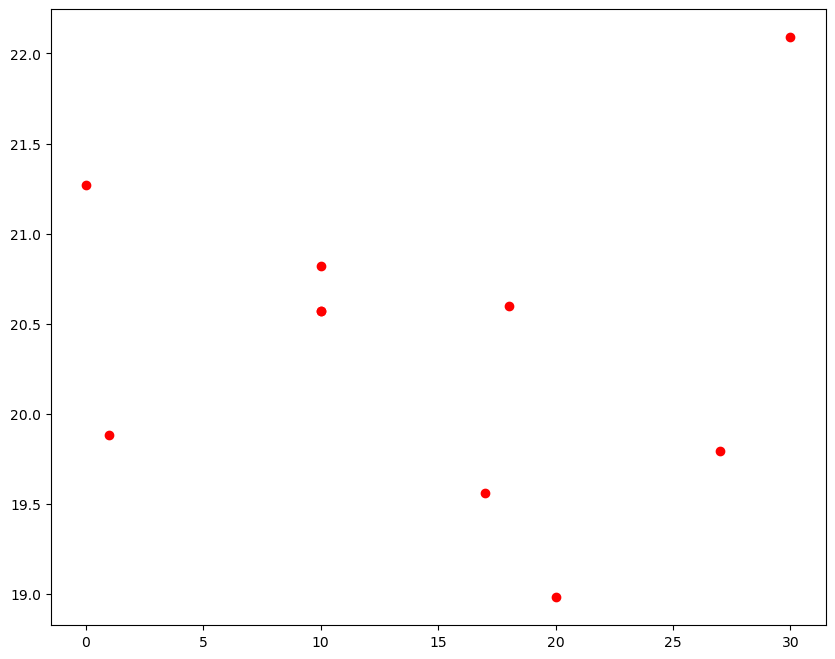

In [85]:
plt.plot(dist,temp_max,'ro')

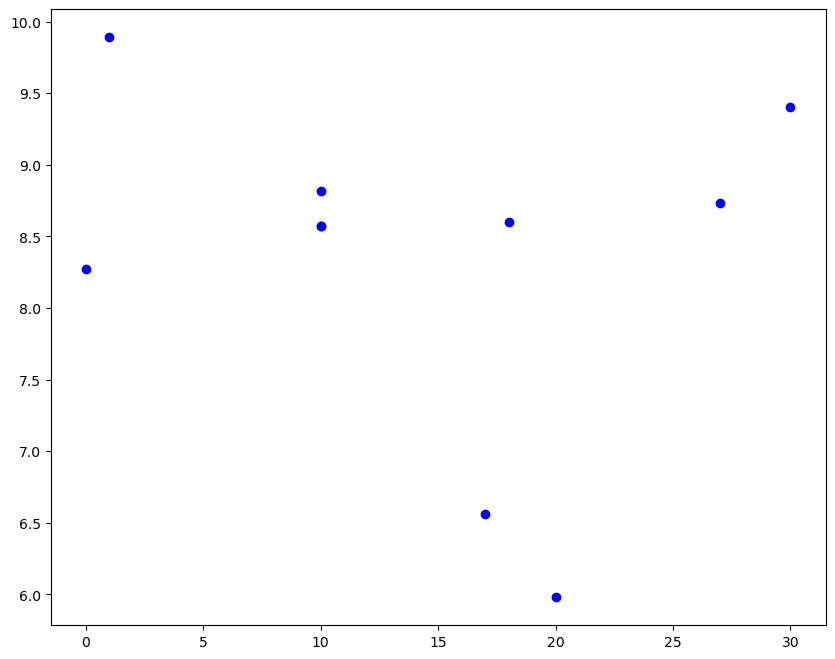

In [87]:
plt.plot(dist,temp_min,'bo')

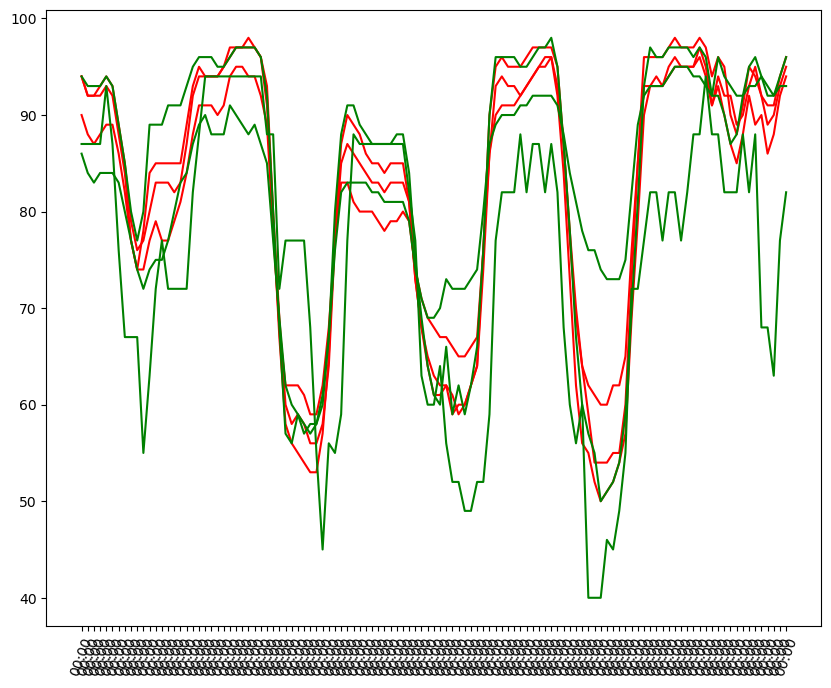

In [89]:
y1=df_kanfanar['humidity']
x1=df_kanfanar['day']
y2=df_pazin['humidity']
x2=df_pazin['day']
y3=df_motovun['humidity']
x3=df_motovun['day']
y4=df_labin['humidity']
x4=df_labin['day']
y5=df_buzet['humidity']
x5=df_buzet['day']
y6=df_buje['humidity']
x6=df_buje['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours=mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r', x2,y2,'r', x3,y3,'r')
plt.plot(x4,y4,'g', x5,y5,'g', x6,y6,'g') 

In [90]:
humidity_max=[
    df_pula['humidity'].max(),
    df_pazin['humidity'].max(),
    df_motovun['humidity'].max(),
    df_labin['humidity'].max(),
    df_buzet['humidity'].max(),
    df_buje['humidity'].max(),
    df_visnjan['humidity'].max(),
    df_kanfanar['humidity'].max(),
    df_zminj['humidity'].max(),
    df_vodnjan['humidity'].max()
] 

In [91]:
humidity_min=[
    df_pula['humidity'].min(),
    df_pazin['humidity'].min(),
    df_motovun['humidity'].min(),
    df_labin['humidity'].min(),
    df_buzet['humidity'].min(),
    df_buje['humidity'].min(),
    df_visnjan['humidity'].min(),
    df_kanfanar['humidity'].min(),
    df_zminj['humidity'].min(),
    df_vodnjan['humidity'].min()
] 

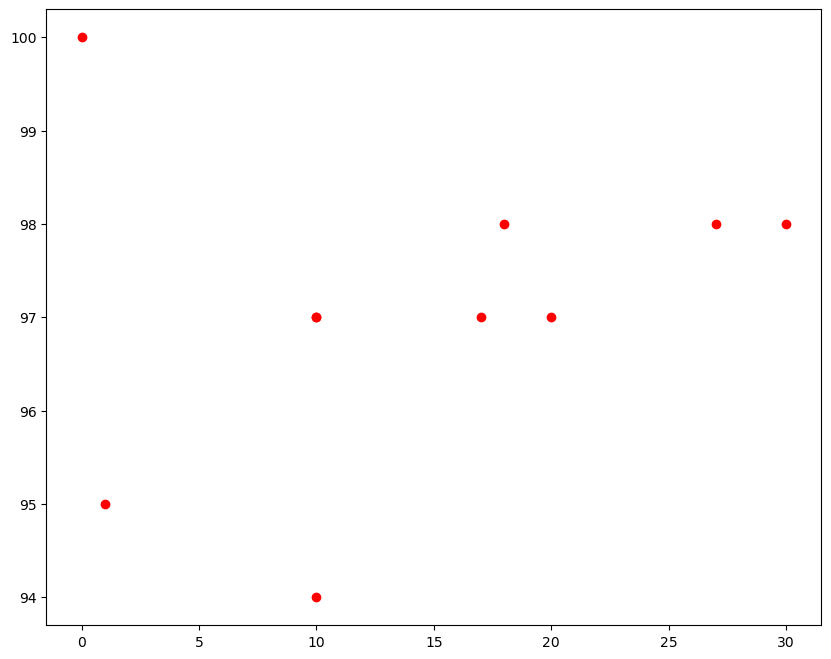

In [92]:
plt.plot(dist,humidity_max,'ro')

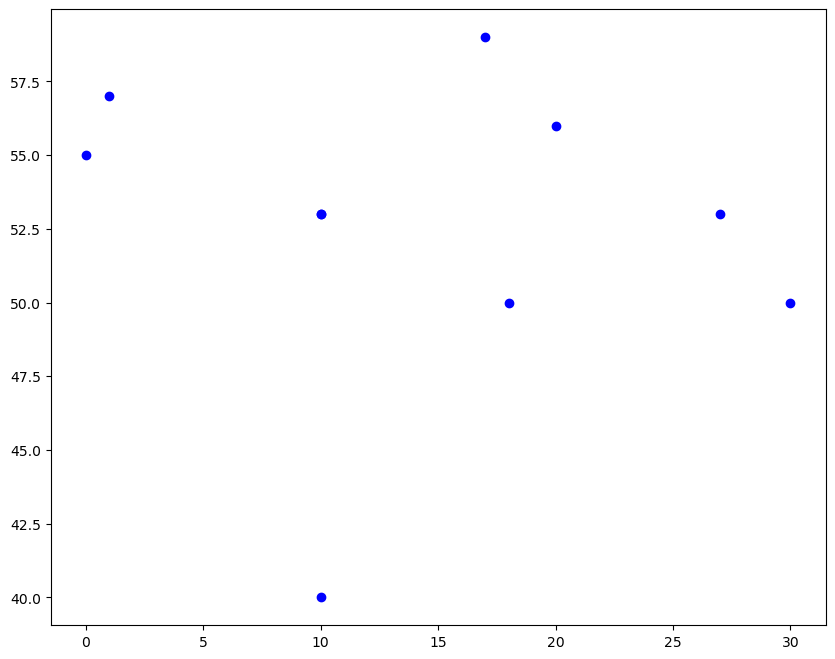

In [93]:
plt.plot(dist,humidity_min,'bo')

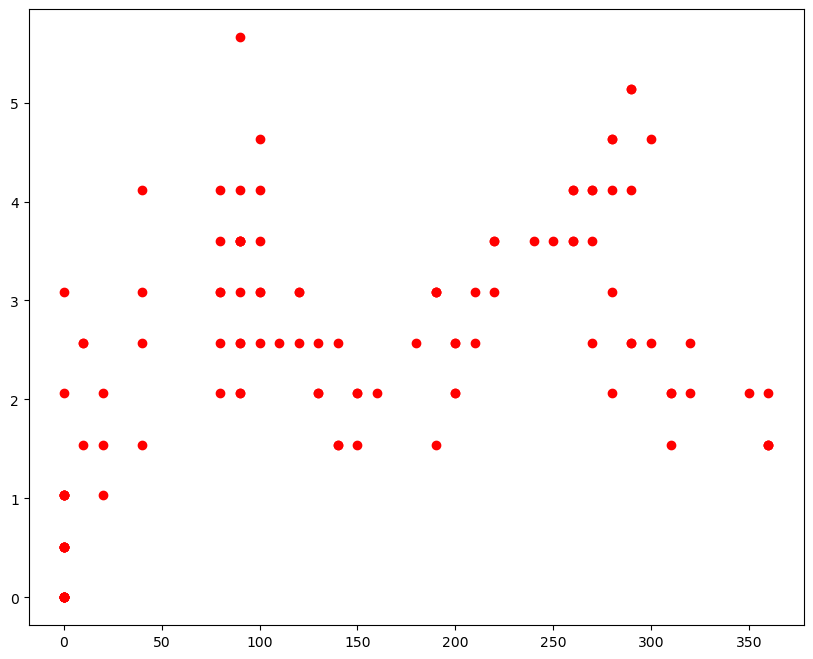

In [95]:
plt.plot(df_pula["wind_deg"],df_pula["wind_speed"],"ro")

In [96]:
hist,bins = np.histogram(df_pula["wind_deg"],8,[0,360])
print(hist)
print(bins)

[32  6 24  7 14  6 19  7]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [97]:
def display_rose_wind(values,city_name,max_value):
	N=8
	theta=np.arange(0.,2*np.pi,2*np.pi/N)
	radii=np.array(values)
	plt.axes([0.025,0.025,0.95,0.95],polar=True)
	colors = [(1-x/max_value,1-x/max_value,0.75) for x in radii]
	plt.bar(theta+np.pi/8,radii,width=(2*np.pi/N),bottom=0.0,color=colors)
	plt.title(city_name,x=0.2,fontsize=20)

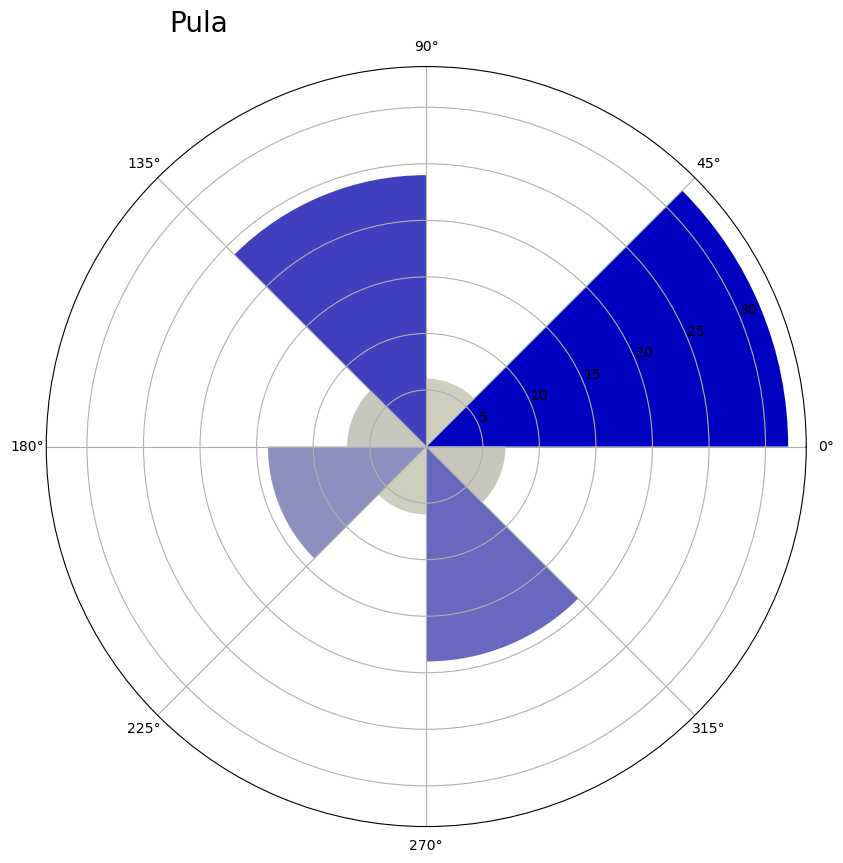

In [98]:
display_rose_wind(hist,"Pula",max(hist))